# Serum proteomic pattern diagnostics

Dataset from the FDA-NCI Clinical Proteomics Program Databank [1,2].

Each column of `A` represents measurements taken from a patient. There are 216 columns representing 216 patients, out of which 121 are ovarian cancer patients and 95 are normal patients.

Each row represents the ion intensity level at a specific mass-charge value indicated in MZ. There are 4000 mass-charge values, and each row represents the ion-intensity levels of the patients at that particular mass-charge value.

The variable `grp` holds the index information as to which of these samples represent cancer patients and which ones represent normal patients.

- [1] T.P. Conrads, et al., ["High-resolution serum proteomic features for ovarian detection"](https://doi.org/10.1677/erc.0.0110163), Endocrine-Related Cancer, 11, 2004, pp. 163-178.
- [2] E.F. Petricoin, et al., ["Use of proteomic patterns in serum to identify ovarian cancer"](https://doi.org/10.1016/s0140-6736(02)07746-2), Lancet, 359(9306), 2002, pp. 572-577.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = 'ovariancancer_obs.csv'
ovariancancer_grp_path = 'ovariancancer_grp.csv'

A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
with open(ovariancancer_grp_path, "r") as fp:
  grp = np.array(fp.read().split("\n"))
grp = grp[grp != '']

How many patients? How many features?

In [2]:
grp.shape,A.shape

((216,), (4000, 216))

How many patiens with and without cancer are there in the dataset?

In [3]:
n_cancer = len(grp[grp == 'Cancer'])
n_normal = len(grp[grp == 'Normal'])

print(f"{n_cancer} cancer samples, {n_normal} normal samples")

121 cancer samples, 95 normal samples


Choose two proteins (between 1 and 4000), and make a scatterplot of the corresponding values plotting with different colors the data corresponding to patients with and without cancer. Can you easily distinguish between patients with/without cancer?

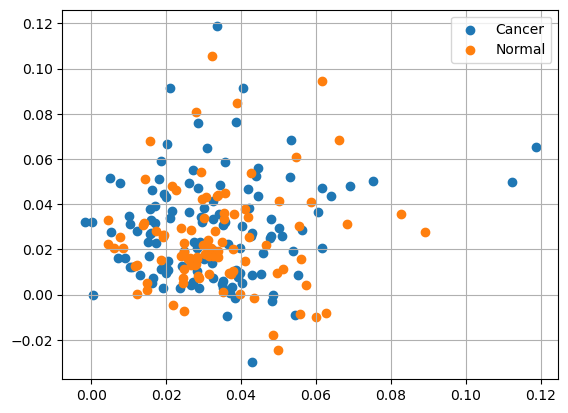

In [4]:
protein_x = 10
protein_y = 999

plt.scatter(A[protein_x,grp == 'Cancer'], A[protein_y,grp == 'Cancer'], label='Cancer')
plt.scatter(A[protein_x,grp == 'Normal'], A[protein_y,grp == 'Normal'], label='Normal')
plt.legend()
plt.grid()

Repeat the previous point, this time by considering three proteins.

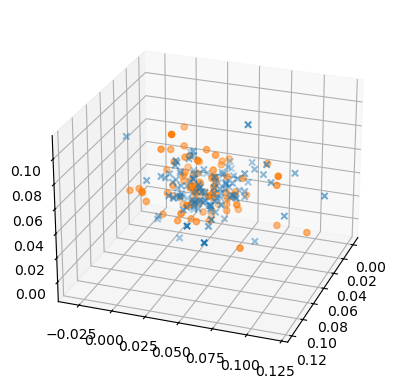

In [5]:
protein_z = 2000

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    A[protein_x,grp == 'Cancer'],
    A[protein_y,grp == 'Cancer'],
    A[protein_z,grp == 'Cancer'],
    marker='x')

ax.scatter(
    A[protein_x,grp == 'Normal'],
    A[protein_y,grp == 'Normal'],
    A[protein_z,grp == 'Normal'],
    marker='o')


ax.view_init(25,20)

In [7]:
import plotly.express as px

px.scatter_3d(
    A[protein_x,:],
    A[protein_y,:],
    A[protein_z,:],
    color=grp
)

## Principal Components Analysis

Perform PCA on the data. 

In [8]:
A_mean = np.mean(A, axis=1)
A_bar = A - A_mean[:,None]

U,S,Vt = np.linalg.svd(A_bar, full_matrices=False)

Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

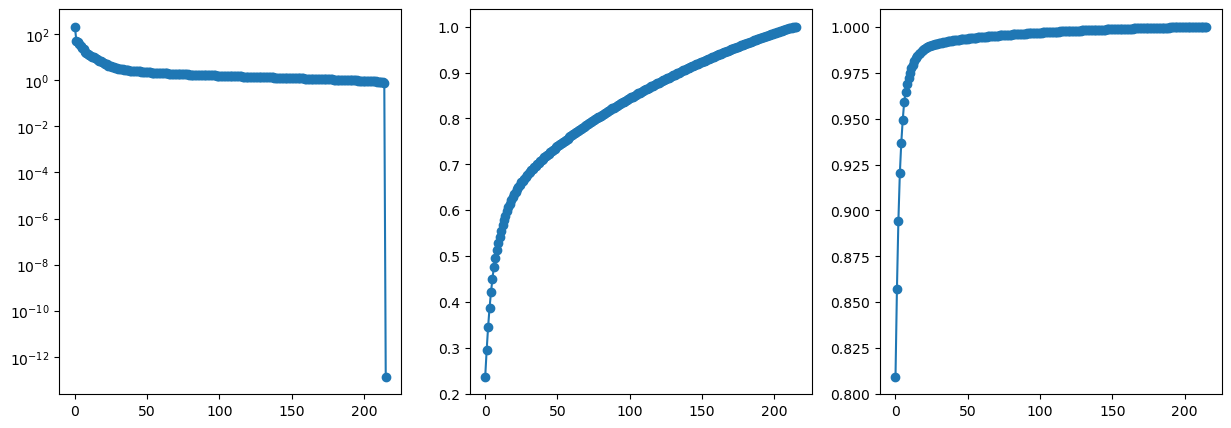

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].semilogy(S,'o-')
axs[1].plot(np.cumsum(S)/np.sum(S),'o-') 
axs[2].plot(np.cumsum(S**2)/np.sum(S**2),'o-')

The single outlier is likely due to numerical instability. Hence, we take it out
Make a scatterplot of the first two principal components of the patients.

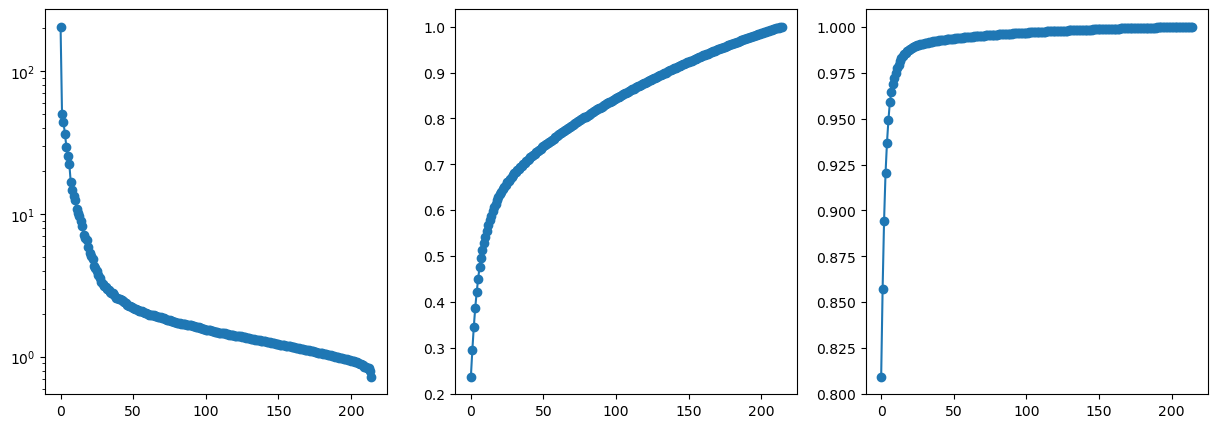

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].semilogy(S[:-1],'o-')
axs[1].plot(np.cumsum(S[:-1])/np.sum(S[:-1]),'o-') 
axs[2].plot(np.cumsum(S[:-1]**2)/np.sum(S[:-1]**2),'o-')

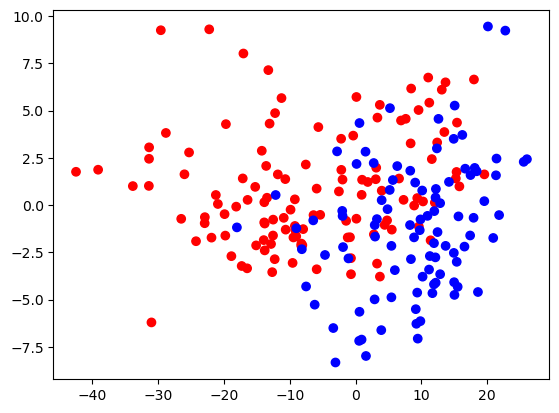

In [11]:
Phi = U.T @ A_bar

COLORMAP = {"Cancer" : "red", "Normal" : "blue"}
plt.scatter(Phi[0,:], Phi[1,:], c=[COLORMAP[g] for g in grp])

Make a scatterplot of the first three principal components of the patients.

In [12]:
# not working - check solutions

px.scatter_3d(
    x = Phi[2,:],
    y = Phi[1,:],
    z = Phi[2,:],
    color = grp
)